## GDP and Internet Usage Project

#### Import Pandas, Numpy, Matploytlib, Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read CSVs In Pandas

In [2]:
gdp_df = pd.read_csv("data/gdp_percapita.csv")
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN
5,Afghanistan,2013,2264.317575,NaN


In [3]:
internet_df = pd.read_csv("data/internet_use.csv")
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.39,NaN
1,Afghanistan,2013,5.9,NaN
2,Afghanistan,2012,5.45454545454545,NaN
3,Afghanistan,2011,5,NaN
4,Afghanistan,2010,4,NaN
5,Afghanistan,2009,3.55,NaN


#### Check Shapes of DataFrames

In [4]:
gdp_df.shape

(6608, 4)

In [5]:
internet_df.shape

(4676, 4)

#### Check DataFrame Types

In [6]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
internet_df.dtypes

Country or Area    object
Year               object
Value              object
Value Footnotes    object
dtype: object

#### Check Tails

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6598,Zimbabwe,1997,3580.048793,NaN
6599,Zimbabwe,1996,3520.430146,NaN
6600,Zimbabwe,1995,3226.413930,NaN
6601,Zimbabwe,1994,3263.934978,NaN
6602,Zimbabwe,1993,3033.504852,NaN
6603,Zimbabwe,1992,3054.889178,NaN
6604,Zimbabwe,1991,3426.598094,NaN
6605,Zimbabwe,1990,3324.348171,NaN
6606,footnoteSeqID,Footnote,NaN,NaN
6607,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4666,171,Internet Dial-up customers.,NaN,NaN
4667,172,Population age 16+ using the Internet in the l...,NaN,NaN
4668,173,Population age 16+ using internet in the last ...,NaN,NaN
4669,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,177,"Pew Internet Project, Internet",Broadband and cell phone statistics,” January 5 2010 http://www.pewinternet.org/~/...
4673,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4674,179,Preliminary. Country estimate.,NaN,NaN
4675,180,The methodology used to estimated the figure f...,NaN,NaN


#### Remove "Value Footnotes" Column

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', 1)

In [11]:
internet_df = internet_df.drop('Value Footnotes', 1)

#### Change Column Names

In [12]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [13]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

#### Merge ALL ROWS from DataFrames

In [14]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer', on=['Country', 'Year'])
# gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', on=['Country', 'Year'])

In [15]:
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7836,171,Internet Dial-up customers.,NaN,NaN
7837,172,Population age 16+ using the Internet in the l...,NaN,NaN
7838,173,Population age 16+ using internet in the last ...,NaN,NaN
7839,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
7840,175,Includes individuals 3 years and older,NaN,NaN
7841,176,NTIA/CPS survey.,NaN,NaN
7842,177,"Pew Internet Project, Internet",NaN,Broadband and cell phone statistics
7843,178,Estimated based on Survey's results. Populatio...,NaN,NaN
7844,179,Preliminary. Country estimate.,NaN,NaN
7845,180,The methodology used to estimated the figure f...,NaN,NaN


###### Dropped Last Row

In [16]:
# gdp_and_internet_use = gdp_and_internet_use.drop(3437,0)

#### Subset Data to Only Include 2004, 2009, 2014

In [17]:
gdp_and_internet_use = gdp_and_internet_use[(gdp_and_internet_use.Year == '2004') | (gdp_and_internet_use.Year == '2009') | (gdp_and_internet_use.Year == '2014')]

In [18]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,2249.253738,6.39
9,Afghanistan,2009,1881.777626,3.55
14,Afghanistan,2004,1284.127338,0.105809030021958
21,Albania,2014,11828.232264,60.1
26,Albania,2009,10528.778102,41.2
...,...,...,...,...
7629,Virgin Islands (U.S.),2009,NaN,27.3965096846662
7634,Virgin Islands (U.S.),2004,NaN,27.3770087880198
7646,Yemen,2014,NaN,22.55
7651,Yemen,2009,NaN,9.96


In [19]:
# gdp_and_internet_use = gdp_and_internet_use.dropna()

#### Convert Value

In [20]:
# df_2014 = df_2014.astype({"Internet_Users_Pct": float})
gdp_and_internet_use = gdp_and_internet_use.astype({'Internet_Users_Pct' : float})

In [21]:
gdp_and_internet_use.dtypes

Country                object
Year                   object
GDP_Per_Capita        float64
Internet_Users_Pct    float64
dtype: object

#### Create 3 New DataFrame for 2004, 2009, 2014

In [22]:
gdp_and_internet_use_2004= gdp_and_internet_use[gdp_and_internet_use.Year == '2004'] 
gdp_and_internet_use_2009 = gdp_and_internet_use[gdp_and_internet_use.Year == '2009'] 
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == '2014'] 

#### Question 18:

In [23]:
# Ian's code
# gdp_and_internet_use_2004[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].max()]

In [24]:
gdp_and_internet_use_2004[gdp_and_internet_use_2004.Internet_Users_Pct==gdp_and_internet_use_2004.Internet_Users_Pct.max()]
# or
# gdp_and_internet_use_2004[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5785,Sweden,2004,45029.814344,83.89


In [25]:
gdp_and_internet_use_2004[gdp_and_internet_use_2004.Internet_Users_Pct==gdp_and_internet_use_2004.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6849,Dem. People's Rep. of Korea,2004,NaN,0.0


In [26]:
gdp_and_internet_use_2009[gdp_and_internet_use_2009.Internet_Users_Pct==gdp_and_internet_use_2009.Internet_Users_Pct.max()]
# or
# gdp_and_internet_use_2009[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2512,Iceland,2009,48428.312438,93.0


In [27]:
gdp_and_internet_use_2009[gdp_and_internet_use_2009.Internet_Users_Pct==gdp_and_internet_use_2009.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6844,Dem. People's Rep. of Korea,2009,NaN,0.0


In [28]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014.Internet_Users_Pct==gdp_and_internet_use_2014.Internet_Users_Pct.max()]
# or
# gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2507,Iceland,2014,49911.069825,98.16


In [29]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014.Internet_Users_Pct==gdp_and_internet_use_2014.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6840,Dem. People's Rep. of Korea,2014,NaN,0.0


In [30]:
# code for sorting
# gdp_and_internet_use_2004.sort_values("Internet_Users_Pct", ascending=False)

#### 21/22 Highest and Lowest GDP Per Capita in 2014

In [31]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014.GDP_Per_Capita==gdp_and_internet_use_2014.GDP_Per_Capita.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3564,"Macao SAR, China",2014,156514.13385,NaN


In [32]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014.GDP_Per_Capita==gdp_and_internet_use_2014.GDP_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
983,Central African Republic,2014,822.610458,NaN


#### Scatter Plots

Text(0.5, 1.0, 'GDP and Internet Use 2004')

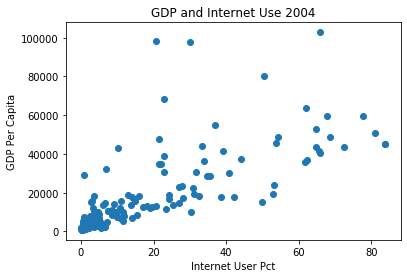

In [33]:
plt.scatter(gdp_and_internet_use_2004.Internet_Users_Pct, gdp_and_internet_use_2004.GDP_Per_Capita)
plt.xlabel('Internet User Pct')
plt.ylabel('GDP Per Capita')
plt.title('GDP and Internet Use 2004')

Text(0.5, 1.0, 'GDP and Internet Use 2009')

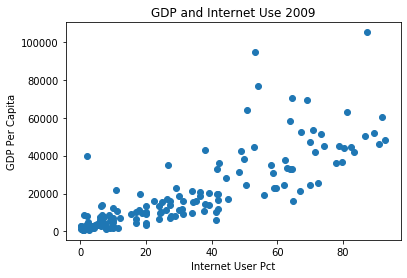

In [34]:
plt.scatter(gdp_and_internet_use_2009.Internet_Users_Pct, gdp_and_internet_use_2009.GDP_Per_Capita)
plt.xlabel('Internet User Pct')
plt.ylabel('GDP Per Capita')
plt.title('GDP and Internet Use 2009')

Text(0.5, 1.0, 'GDP and Internet Use 2014')

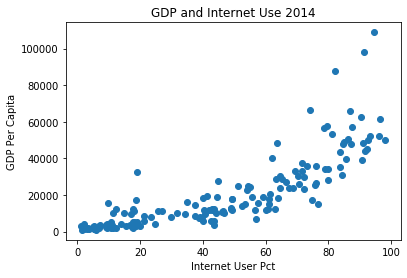

In [35]:
plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita)
plt.xlabel('Internet User Pct')
plt.ylabel('GDP Per Capita')
plt.title('GDP and Internet Use 2014')

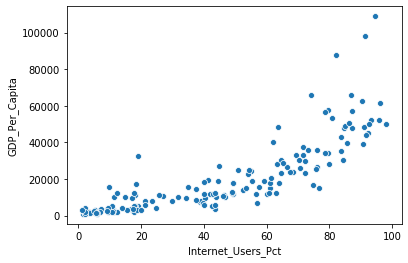

In [36]:
sns.scatterplot(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita)

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([146.,  41.,  24.,  19.,   3.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <a list of 10 Patch objects>)

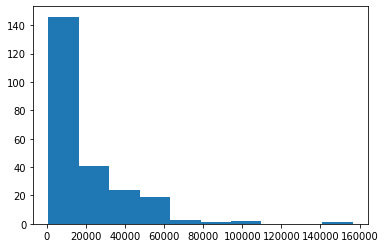

In [52]:
plt.hist(gdp_and_internet_use_2014.GDP_Per_Capita)

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <a list of 10 Patch objects>)

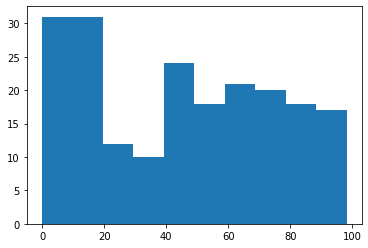

In [38]:
plt.hist(gdp_and_internet_use_2014.Internet_Users_Pct)

In [39]:
gdp_and_internet_use_2014.sort_values("Internet_Users_Pct", ascending=False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2507,Iceland,2014,49911.069825,98.16
6651,Bermuda,2014,NaN,96.80
4461,Norway,2014,61308.763730,96.30
1374,Denmark,2014,52172.606425,95.99
6611,Andorra,2014,NaN,95.90


In [42]:
# top_5_countries = ['Iceland', 'Norway', 'Denmark', 'Luxembourg', 'Netherlands']
top_5_internet = gdp_and_internet_use[gdp_and_internet_use.Country.isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])]
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1374,Denmark,2014,52172.606425,95.990000
1379,Denmark,2009,50233.702688,86.840000
1384,Denmark,2004,50566.988088,80.930000
2507,Iceland,2014,49911.069825,98.160000
2512,Iceland,2009,48428.312438,93.000000
2517,Iceland,2004,45380.965464,83.880000
4461,Norway,2014,61308.763730,96.300000
4466,Norway,2009,60620.334503,92.080000
4471,Norway,2004,59647.501415,77.690000
6611,Andorra,2014,NaN,95.900000


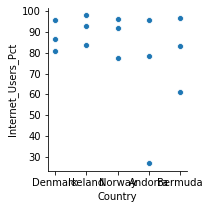

In [51]:
g = sns.FacetGrid(top_5_internet)
g.map(sns.scatterplot, 'Country', 'Internet_Users_Pct')